In [1]:
import numpy as np
from pathlib import Path

from matplotlib import pyplot as plt
from nflows import transforms
from nflows.distributions import StandardNormal
from nflows.flows import Flow
from nflows.utils import tensor2numpy
from torch.utils.data import DataLoader

from ffflows.data.dist_to_dist import UnconditionalDataToData
from ffflows.data.plane import Anulus, ConditionalAnulus, CheckerboardDataset, FourCircles, ConcentricRings, \
    TwoSpiralsDataset
from ffflows.models import FlowForFlow, DeltaFlowForFlow
from torch.nn import functional as F
import torch

In [2]:
from scipy.ndimage.interpolation import rotate

In [3]:
def make_rot_matrix(angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return R


def rotate(data, angle):
    print(angle)
    if not isinstance(angle, np.ndarray):
        R = make_rot_matrix(angle)
        return tensor2numpy(base_data.data) @ R
    else:
        R = np.array([make_rot_matrix(theta) for theta in angle])
        return np.einsum('ij,ijk->ik', data, R)

In [4]:
# write angle in degrees
angle = 45
n_points = int(1e4)
base_data = CheckerboardDataset(n_points)
cond_data = rotate(base_data.data, angle)
# Assume data lies in [-4, 4] and scale so 45 degree rotation still in this square
scale = np.sqrt(2 * 4 ** 2)
cond_data = cond_data / scale * 4

45


In [5]:
def add_plot(ax, data):
#     data = tensor2numpy(data)
    bound = 4
    bounds = [[-bound, bound], [-bound, bound]]
    ax.hist2d(data[:, 0], data[:, 1], bins=256)
    ax.set_xlim(bounds[0])
    ax.set_ylim(bounds[1])

<ipython-input-6-254114d07004>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


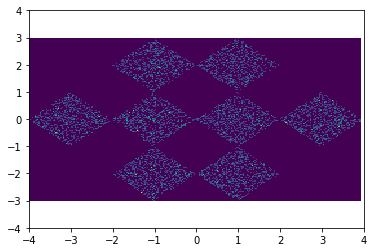

In [6]:
fig, ax = plt.subplots(1, 1)
add_plot(ax, cond_data)
fig.show()

In [7]:
# Random angle rotations

In [8]:
max_angle = 360

scale = np.sqrt(2 * 4 ** 2)
# write angle in degrees
n_points = int(1e4)
base_data = CheckerboardDataset(n_points)
angles = np.random.randint(0, max_angle, n_points)
cond_data = rotate(base_data.data, angles)
# Assume data lies in [-4, 4] and scale so 45 degree rotation still in this square
scale = np.sqrt(2 * 4 ** 2)
cond_data = cond_data / scale * 4

[299 233 255 ... 248  44 192]


<ipython-input-9-254114d07004>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


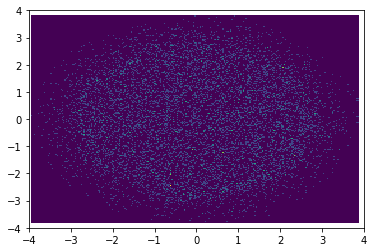

In [9]:
fig, ax = plt.subplots(1, 1)
add_plot(ax, cond_data)
fig.show()

# Building actual classes

In [69]:
def add_plot(ax, data):
    data = tensor2numpy(data)
    bound = 4
    bounds = [[-bound, bound], [-bound, bound]]
    ax.hist2d(data[:, 0], data[:, 1], bins=256)
    ax.set_xlim(bounds[0])
    ax.set_ylim(bounds[1])

In [70]:
%load_ext autoreload
%autoreload 2
from ffflows.data.conditional_plane import RotatedData, RadialShift

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-71-ab659290a3ab>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


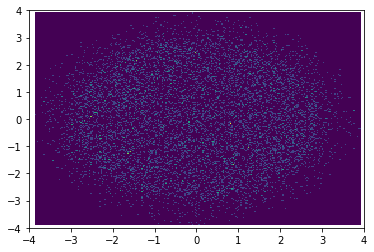

In [71]:
dataset = RotatedData(CheckerboardDataset(n_points))
fig, ax = plt.subplots(1, 1)
dt = torch.cat([dt[0] for dt in dataset.data]).view(-1, 2)
add_plot(ax, dt)
fig.show()

<ipython-input-72-975796d7621a>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


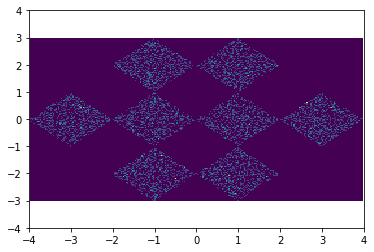

In [72]:
dataset = RotatedData(CheckerboardDataset(n_points))
dataset._create_data(angles=45)
fig, ax = plt.subplots(1, 1)
dt = torch.cat([dt[0] for dt in dataset.data]).view(-1, 2)
add_plot(ax, dt)
fig.show()

In [101]:
from ffflows.data.conditional_plane import RadialShift

<ipython-input-102-92c67327e1a9>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


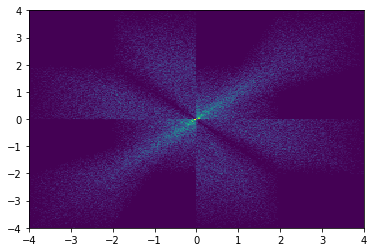

In [102]:
n_points = int(1e5)
dataset = RadialShift(CheckerboardDataset(n_points))
# dataset._create_data(shift=0.5)
fig, ax = plt.subplots(1, 1)
dt = torch.cat([dt[0] for dt in dataset.data]).view(-1, 2)
add_plot(ax, dt)
fig.show()

<ipython-input-80-f11dee325730>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


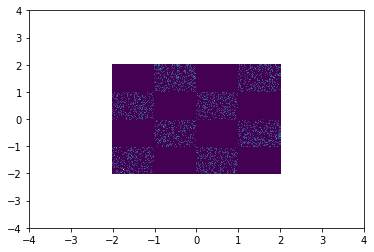

In [80]:
dataset = RadialShift(CheckerboardDataset(n_points))
dataset._create_data(shift=0.5)
fig, ax = plt.subplots(1, 1)
dt = torch.cat([dt[0] for dt in dataset.data]).view(-1, 2)
add_plot(ax, dt)
fig.show()

In [107]:
from ffflows.data.conditional_plane import ElipseShift

<ipython-input-108-3c2f35f74ff9>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


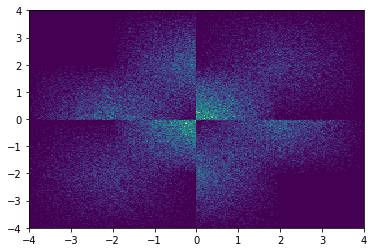

In [108]:
n_points = int(1e5)
dataset = ElipseShift(CheckerboardDataset(n_points))
# dataset._create_data(shift=0.5)
fig, ax = plt.subplots(1, 1)
dt = torch.cat([dt[0] for dt in dataset.data]).view(-1, 2)
add_plot(ax, dt)
fig.show()

<ipython-input-111-9c58f61f9991>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


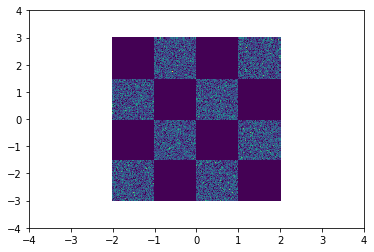

In [111]:
from ffflows.data.conditional_plane import ElipseShift
dataset = ElipseShift(CheckerboardDataset(n_points))
dataset._create_data(shift_x=0.5, shift_y=0.75)
fig, ax = plt.subplots(1, 1)
dt = torch.cat([dt[0] for dt in dataset.data]).view(-1, 2)
add_plot(ax, dt)
fig.show()